In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
survey = pd.read_csv('../Quarantine Survey(1-90).csv',sep=",", encoding='cp1252')
survey.head()

,ID,Start time,Completion time,Email,Name,How many hours a week do you currently work and/or attend class?,How many people do you currently live with?,How many hours a week do you currently spend on making or fixing things as a hobby?,Do you have pets? How many?,Do you feel like you decide how your day goes?,...,How many hours a night do you sleep?,"Do you feel that the quarantine has resulted in spending more or less time talking with your boss, teachers, and work peers?",Do you feel like you decide what’s on your To-do list?,How many hours a day do you spend outside?,"Do you currently feel like you are more rested, or overworked?",How many hours a week do you spend reading something you enjoy?,.,How many hours a week are accounted for?,What is the average Outlook score?,What was the completion time?
0,1,5/12/20 14:33:34,5/12/20 14:36:26,anonymous,NaN,40.0,1,4,3,6,...,7.0,Less,6,0.5,6,2,NaN,14.8,5.4,0:02:52
1,2,5/12/20 14:34:43,5/12/20 14:37:32,anonymous,NaN,30.0,5,5,1,8,...,8.0,Less,5,1.0,6,10,NaN,20.7,5.6,0:02:49
2,3,5/12/20 14:34:29,5/12/20 14:38:41,anonymous,NaN,40.0,2,0,0,9,...,8.0,No Change,9,1.5,2,1,NaN,19.1,6.6,0:04:12
3,4,5/12/20 14:41:40,5/12/20 14:44:30,anonymous,NaN,40.0,3,5,1,7,...,6.0,Less,7,2.0,8,6,NaN,18.1,6.8,0:02:50
4,5,5/12/20 14:41:24,5/12/20 14:53:32,anonymous,NaN,35.0,1,30,2,6,...,7.0,Less,7,0.0,5,8,NaN,21.7,5.2,0:12:08


In [3]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 29 columns):
 #   Column                                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                                        --------------  -----  
 0   ID                                                                                                                            90 non-null     int64  
 1   Start time                                                                                                                    90 non-null     object 
 2   Completion time                                                                                                               90 non-null     object 
 3   Email                                                                                                                

In [5]:
#Create a copy that removes the colums we won't be working with
survey_data_new = survey.drop(['ID', 'Start time', 'Completion time', 'Email', 'Name', '.'], axis=1).copy()
survey_data_new.head()

,How many hours a week do you currently work and/or attend class?,How many people do you currently live with?,How many hours a week do you currently spend on making or fixing things as a hobby?,Do you have pets? How many?,Do you feel like you decide how your day goes?,How many hours a week do you currently spend studying outside of class?,How many hours a week do you currently spend socializing with your social inner circle?,Do you currently work from home?,How many hours a week do you currently spend exercising?,"At the end of the week, do you feel like you have more or less things on your To-do list?",...,How do you feel going throughout your day?,How many hours a night do you sleep?,"Do you feel that the quarantine has resulted in spending more or less time talking with your boss, teachers, and work peers?",Do you feel like you decide what’s on your To-do list?,How many hours a day do you spend outside?,"Do you currently feel like you are more rested, or overworked?",How many hours a week do you spend reading something you enjoy?,How many hours a week are accounted for?,What is the average Outlook score?,What was the completion time?
0,40.0,1,4,3,6,2,1.0,Yes,1,Less,...,6,7.0,Less,6,0.5,6,2,14.8,5.4,0:02:52
1,30.0,5,5,1,8,25,5.0,Yes,5,More,...,7,8.0,Less,5,1.0,6,10,20.7,5.6,0:02:49
2,40.0,2,0,0,9,20,3.0,Yes,2,No Change,...,8,8.0,No Change,9,1.5,2,1,19.1,6.6,0:04:12
3,40.0,3,5,1,7,10,5.0,Yes,5,More,...,6,6.0,Less,7,2.0,8,6,18.1,6.8,0:02:50
4,35.0,1,30,2,6,20,5.0,Yes,5,No Change,...,5,7.0,Less,7,0.0,5,8,21.7,5.2,0:12:08


In [6]:
#Now we are going to recreate the AGE_BRACKETS column from the Income Analysis notebook, so we can join on it
age_brackets = pd.interval_range(start=15, freq=5, end=90, closed='left')

survey_data_new['AGE_BRACKET'] = pd.cut(survey_data_new['How old are you?'], bins=age_brackets)

survey_data_new['AGE_BRACKET'] = survey_data_new['AGE_BRACKET'].astype(str).str.replace('[','')
survey_data_new['AGE_BRACKET'] = survey_data_new['AGE_BRACKET'].astype(str).str.replace(')','')
survey_data_new['AGE_BRACKET'] = survey_data_new['AGE_BRACKET'].astype(str).str.replace(',',' -')
survey_data_new

,How many hours a week do you currently work and/or attend class?,How many people do you currently live with?,How many hours a week do you currently spend on making or fixing things as a hobby?,Do you have pets? How many?,Do you feel like you decide how your day goes?,How many hours a week do you currently spend studying outside of class?,How many hours a week do you currently spend socializing with your social inner circle?,Do you currently work from home?,How many hours a week do you currently spend exercising?,"At the end of the week, do you feel like you have more or less things on your To-do list?",...,How many hours a night do you sleep?,"Do you feel that the quarantine has resulted in spending more or less time talking with your boss, teachers, and work peers?",Do you feel like you decide what’s on your To-do list?,How many hours a day do you spend outside?,"Do you currently feel like you are more rested, or overworked?",How many hours a week do you spend reading something you enjoy?,How many hours a week are accounted for?,What is the average Outlook score?,What was the completion time?,AGE_BRACKET
0,40.0,1,4,3,6,2,1.0,Yes,1,Less,...,7.0,Less,6,0.5,6,2,14.8,5.4,0:02:52,30.0 - 35.0
1,30.0,5,5,1,8,25,5.0,Yes,5,More,...,8.0,Less,5,1.0,6,10,20.7,5.6,0:02:49,30.0 - 35.0
2,40.0,2,0,0,9,20,3.0,Yes,2,No Change,...,8.0,No Change,9,1.5,2,1,19.1,6.6,0:04:12,25.0 - 30.0
3,40.0,3,5,1,7,10,5.0,Yes,5,More,...,6.0,Less,7,2.0,8,6,18.1,6.8,0:02:50,35.0 - 40.0
4,35.0,1,30,2,6,20,5.0,Yes,5,No Change,...,7.0,Less,7,0.0,5,8,21.7,5.2,0:12:08,40.0 - 45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,40.0,0,0,0,6,2,2.0,Yes,8,More,...,7.0,More,4,8.0,7,1,22.9,5.0,0:04:56,40.0 - 45.0
86,45.0,1,1,2,6,0,2.0,No,0,More,...,6.0,More,6,2.0,6,10,16.3,4.8,0:01:43,35.0 - 40.0
87,40.0,1,2,10,7,0,5.0,Yes,3,No Change,...,8.0,More,6,2.0,4,5,17.9,5.2,0:02:15,30.0 - 35.0
88,40.0,1,4,5,5,0,5.0,Yes,0,No Change,...,8.0,No Change,4,2.0,6,3,17.4,5.0,0:12:21,25.0 - 30.0


In [7]:
income_by_age_bracket = pd.read_csv('../income_by_age_bracket.csv')
#income_by_age_bracket = income_by_age_bracket['AGE_BRACKET', 'PTOTVAL']
income_by_age_bracket

,Unnamed: 0,AGE_BRACKET,PTOTVAL
0,0,15.0 - 20.0,0.0
1,1,20.0 - 25.0,15250.0
2,2,25.0 - 30.0,35020.0
3,3,30.0 - 35.0,38000.0
4,4,35.0 - 40.0,50259.0
5,5,40.0 - 45.0,47510.5
6,6,45.0 - 50.0,40000.0
7,7,50.0 - 55.0,35800.0
8,8,55.0 - 60.0,52835.0
9,9,60.0 - 65.0,36989.5


In [ ]:
#Copy/paste correlation matrix to play around with
f = plt.figure(figsize=(19, 12))
plt.matshow(survey_data_new.corr(), fignum=f.number)
plt.xticks(range(survey_data_new.shape[1]), survey_data_new.columns, fontsize=12, rotation=60)
plt.yticks(range(survey_data_new.shape[1]), survey_data_new.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

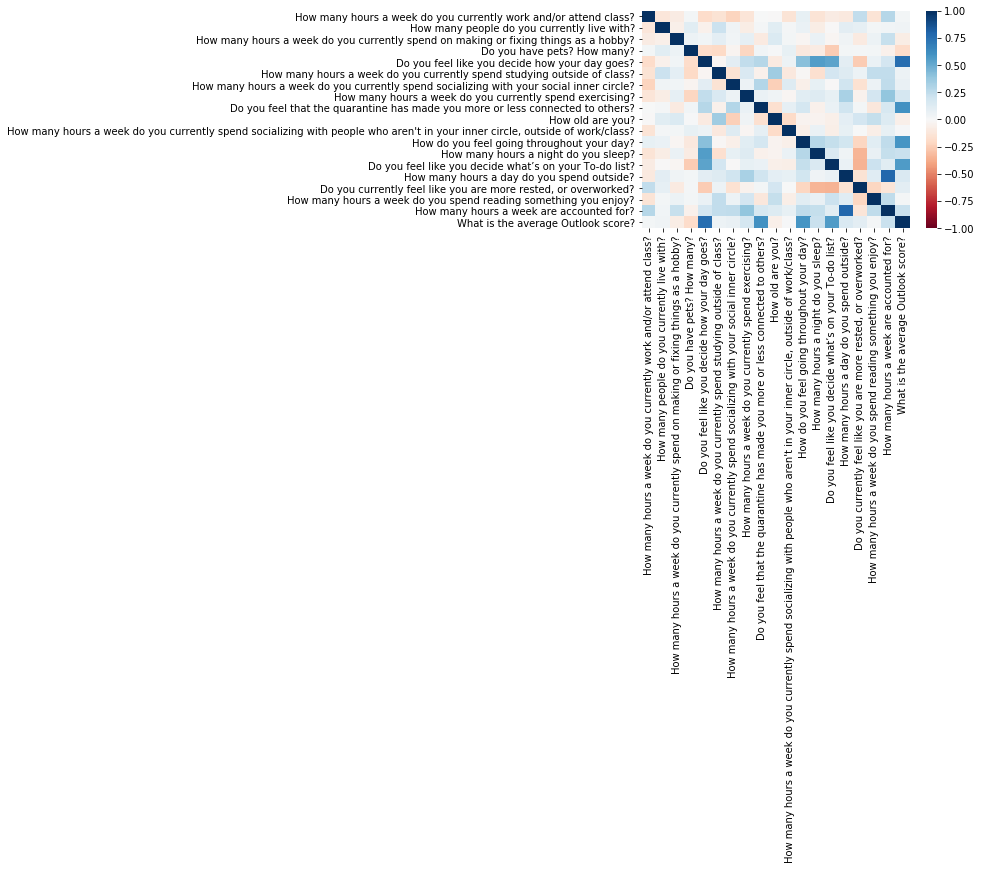

In [22]:
#sns.palplot(sns.diverging_palette(255, 133, l=60, n=7, center="light"))
_ = sns.heatmap(survey_data_new.corr(), vmin = -1, vmax = 1, center = 0, cmap = "RdBu")
_ = plt.show()

In [9]:
survey_data_new.corr()

,How many hours a week do you currently work and/or attend class?,How many people do you currently live with?,How many hours a week do you currently spend on making or fixing things as a hobby?,Do you have pets? How many?,Do you feel like you decide how your day goes?,How many hours a week do you currently spend studying outside of class?,How many hours a week do you currently spend socializing with your social inner circle?,How many hours a week do you currently spend exercising?,Do you feel that the quarantine has made you more or less connected to others?,How old are you?,"How many hours a week do you currently spend socializing with people who aren't in your inner circle, outside of work/class?",How do you feel going throughout your day?,How many hours a night do you sleep?,Do you feel like you decide what’s on your To-do list?,How many hours a day do you spend outside?,"Do you currently feel like you are more rested, or overworked?",How many hours a week do you spend reading something you enjoy?,How many hours a week are accounted for?,What is the average Outlook score?
How many hours a week do you currently work and/or attend class?,1.000000,-0.121577,-0.078210,0.026368,-0.182680,-0.144944,-0.224475,-0.125544,0.005706,-0.001686,-0.138302,0.081679,-0.139215,-0.085087,-0.101124,0.246964,-0.140271,0.284440,0.023540
How many people do you currently live with?,-0.121577,1.000000,-0.060966,0.111777,-0.049104,0.215586,0.040096,-0.072888,0.020357,0.113276,0.019287,0.068053,-0.076880,-0.004657,0.104918,0.088200,0.030226,0.036261,0.045260
How many hours a week do you currently spend on making or fixing things as a hobby?,-0.078210,-0.060966,1.000000,0.059839,0.036233,0.098939,0.034033,0.088038,-0.090548,0.141316,0.027877,-0.018623,0.063045,-0.019827,0.045035,-0.093625,0.061902,0.226970,-0.072343
Do you have pets? How many?,0.026368,0.111777,0.059839,1.000000,-0.182468,-0.199942,-0.026589,-0.217358,0.031548,0.015074,0.080391,-0.108981,-0.085664,-0.253257,0.027729,0.023274,0.024772,-0.048669,-0.185377
Do you feel like you decide how your day goes?,-0.182680,-0.049104,0.036233,-0.182468,1.000000,-0.023107,0.103923,0.245222,0.285033,-0.088458,0.054754,0.420853,0.560210,0.539007,0.102054,-0.253855,0.069596,0.186603,0.760376
How many hours a week do you currently spend studying outside of class?,-0.144944,0.215586,0.098939,-0.199942,-0.023107,1.000000,-0.142216,0.155516,-0.054044,0.356630,-0.105145,-0.010302,-0.156921,0.186265,0.128856,0.060214,0.244142,0.245419,0.061091
How many hours a week do you currently spend socializing with your social inner circle?,-0.224475,0.040096,0.034033,-0.026589,0.103923,-0.142216,1.000000,0.056523,0.296028,-0.236819,0.132734,-0.061674,0.081339,-0.000346,0.197810,-0.148735,0.059837,0.252672,0.076760
How many hours a week do you currently spend exercising?,-0.125544,-0.072888,0.088038,-0.217358,0.245222,0.155516,0.056523,1.000000,0.067635,0.041083,-0.015909,0.112172,0.130858,0.078752,0.325919,-0.045721,0.185731,0.393577,0.174885
Do you feel that the quarantine has made you more or less connected to others?,0.005706,0.020357,-0.090548,0.031548,0.285033,-0.054044,0.296028,0.067635,1.000000,-0.161480,0.087323,0.174356,-0.049753,0.068792,0.200888,0.029924,-0.114625,0.164702,0.603972
How old are you?,-0.001686,0.113276,0.141316,0.015074,-0.088458,0.356630,-0.236819,0.041083,-0.161480,1.000000,-0.192836,-0.034252,-0.032531,-0.055036,0.095195,0.185950,0.237063,0.135875,-0.057254


,How many hours a week do you currently work and/or attend class?,How many people do you currently live with?,How many hours a week do you currently spend on making or fixing things as a hobby?,Do you have pets? How many?,Do you feel like you decide how your day goes?,How many hours a week do you currently spend studying outside of class?,How many hours a week do you currently spend socializing with your social inner circle?,How many hours a week do you currently spend exercising?,Do you feel that the quarantine has made you more or less connected to others?,How old are you?,"How many hours a week do you currently spend socializing with people who aren't in your inner circle, outside of work/class?",How do you feel going throughout your day?,How many hours a night do you sleep?,Do you feel like you decide what’s on your To-do list?,How many hours a day do you spend outside?,"Do you currently feel like you are more rested, or overworked?",How many hours a week do you spend reading something you enjoy?,How many hours a week are accounted for?,What is the average Outlook score?
How many hours a week do you currently work and/or attend class?,1.000000,-0.121577,-0.078210,0.026368,-0.182680,-0.144944,-0.224475,-0.125544,0.005706,-0.001686,-0.138302,0.081679,-0.139215,-0.085087,-0.101124,0.246964,-0.140271,0.284440,0.023540
How many people do you currently live with?,-0.121577,1.000000,-0.060966,0.111777,-0.049104,0.215586,0.040096,-0.072888,0.020357,0.113276,0.019287,0.068053,-0.076880,-0.004657,0.104918,0.088200,0.030226,0.036261,0.045260
How many hours a week do you currently spend on making or fixing things as a hobby?,-0.078210,-0.060966,1.000000,0.059839,0.036233,0.098939,0.034033,0.088038,-0.090548,0.141316,0.027877,-0.018623,0.063045,-0.019827,0.045035,-0.093625,0.061902,0.226970,-0.072343
Do you have pets? How many?,0.026368,0.111777,0.059839,1.000000,-0.182468,-0.199942,-0.026589,-0.217358,0.031548,0.015074,0.080391,-0.108981,-0.085664,-0.253257,0.027729,0.023274,0.024772,-0.048669,-0.185377
Do you feel like you decide how your day goes?,-0.182680,-0.049104,0.036233,-0.182468,1.000000,-0.023107,0.103923,0.245222,0.285033,-0.088458,0.054754,0.420853,0.560210,0.539007,0.102054,-0.253855,0.069596,0.186603,0.760376
How many hours a week do you currently spend studying outside of class?,-0.144944,0.215586,0.098939,-0.199942,-0.023107,1.000000,-0.142216,0.155516,-0.054044,0.356630,-0.105145,-0.010302,-0.156921,0.186265,0.128856,0.060214,0.244142,0.245419,0.061091
How many hours a week do you currently spend socializing with your social inner circle?,-0.224475,0.040096,0.034033,-0.026589,0.103923,-0.142216,1.000000,0.056523,0.296028,-0.236819,0.132734,-0.061674,0.081339,-0.000346,0.197810,-0.148735,0.059837,0.252672,0.076760
How many hours a week do you currently spend exercising?,-0.125544,-0.072888,0.088038,-0.217358,0.245222,0.155516,0.056523,1.000000,0.067635,0.041083,-0.015909,0.112172,0.130858,0.078752,0.325919,-0.045721,0.185731,0.393577,0.174885
Do you feel that the quarantine has made you more or less connected to others?,0.005706,0.020357,-0.090548,0.031548,0.285033,-0.054044,0.296028,0.067635,1.000000,-0.161480,0.087323,0.174356,-0.049753,0.068792,0.200888,0.029924,-0.114625,0.164702,0.603972
How old are you?,-0.001686,0.113276,0.141316,0.015074,-0.088458,0.356630,-0.236819,0.041083,-0.161480,1.000000,-0.192836,-0.034252,-0.032531,-0.055036,0.095195,0.185950,0.237063,0.135875,-0.057254
